# Лекция 1. Подробнее о линейной регрессии

## Содержание
[1.2 Введение](#1.2)  
[1.3 Линейность взаимосвязи](#1.3)   
[1.4 Логарифмическая трансформация переменных](#1.4)  
[1.5 Проблема гетероскедастичности](#1.5)  
[1.6 ](#1.6)  
[1.7 ](#1.7)  


## 1.2 Введение<a id='1.2'></a>

**Основные ограничения для метода регрессионного анализа**:  
1) Линейность связи зависимой переменной и независимой переменной,  
2) Независимость наблюдений,  
3) Независимость предикторов (проблема мультиколлинеарности),  
4) Гомоскедастичность,  
5) Нормальное распределение остатков,  
6) Отсутствие автокорреляции остатков.  

## 1.3 Линейность взаимосвязи<a id='1.3'></a>

### Основные понятия и тезисы:  
Если данные ведут себя нелинейно:  
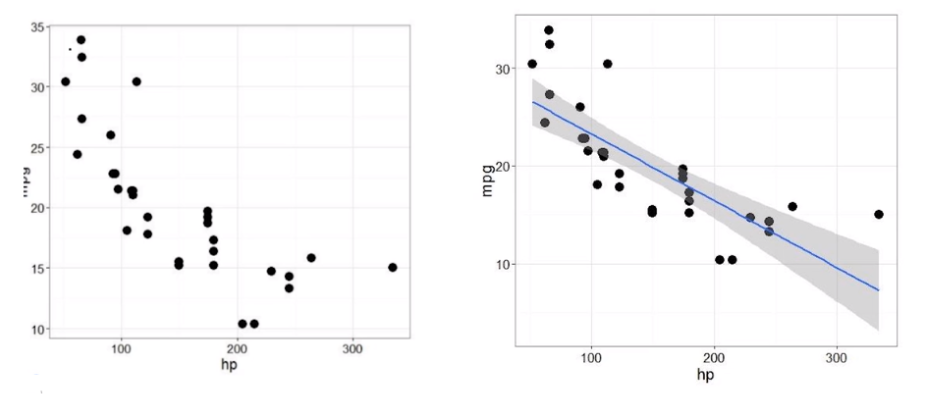  
Есть возможность преобразовать данные(ЗП или НП):  
* **Трансформация Тьюки** - преобразование ЗП(y), НП(x), или обе переменные, путем возведения в степень.  
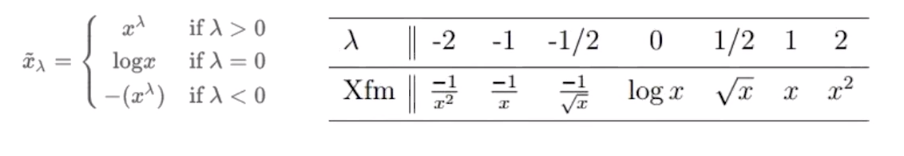  
При использовании отрицательного показателя степени берется получившаяся переменная с обратным знаком, чтобы избежать изменения направления исходной взаимосвязи.  

### Примеры:

In [1]:
library(ggplot2)

data(mtcars)

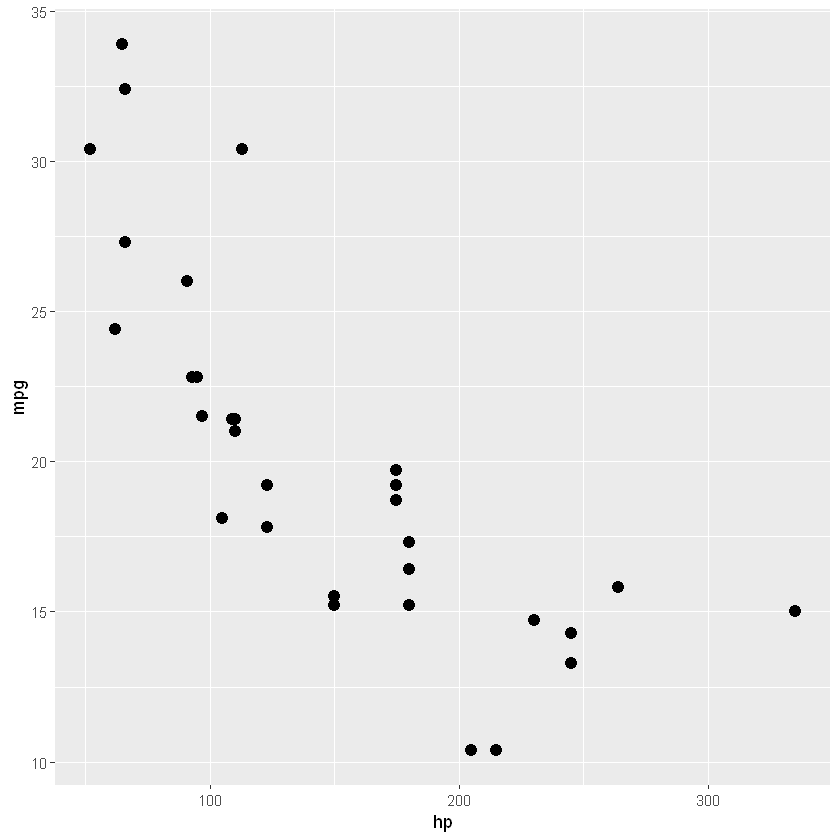

In [2]:
# Исходная зависимость
ggplot(mtcars, aes(x = hp, y = mpg)) + geom_point(size = 3)

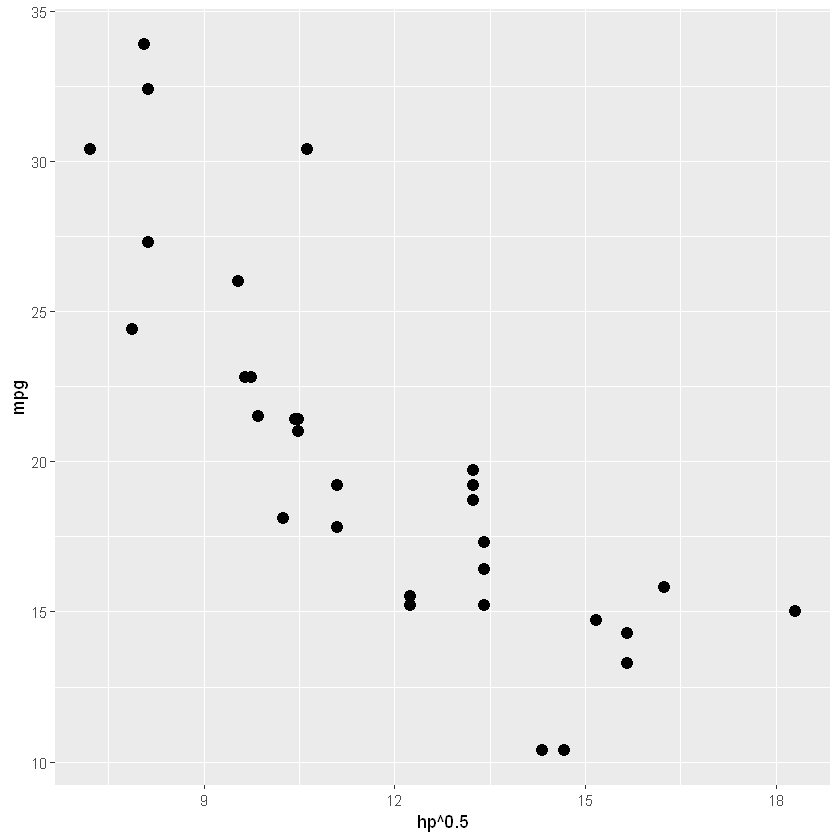

In [3]:
# взятие x в корень - взаимосвязь стала более линейной
ggplot(mtcars, aes(x = hp^0.5, y = mpg)) + geom_point(size = 3)

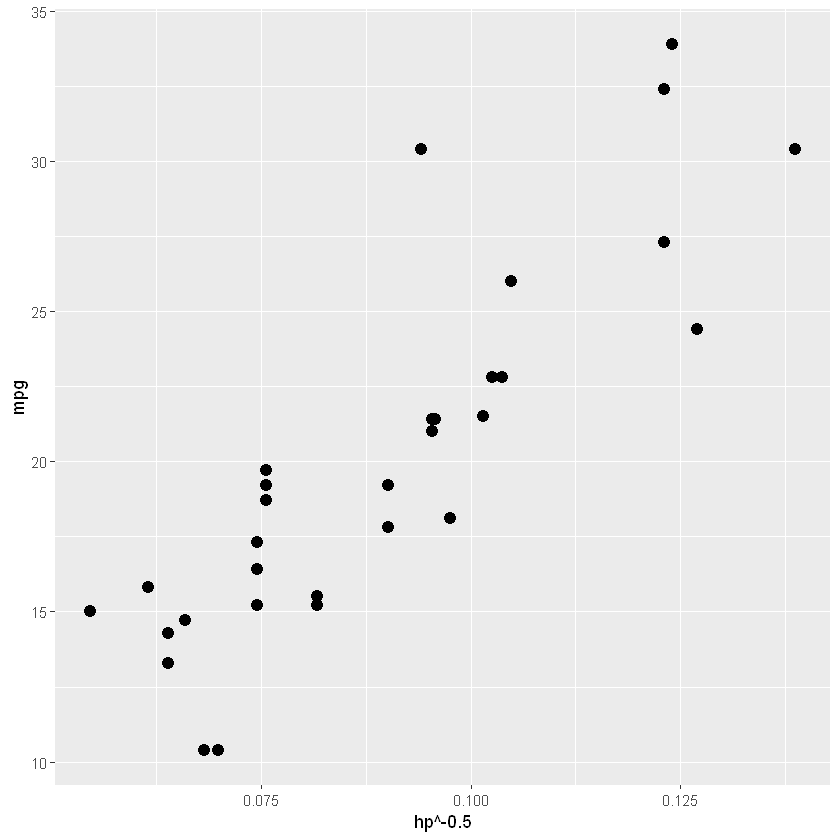

In [4]:
# возведение x в степень -1/2 - изменяется направление взаимосвязи
ggplot(mtcars, aes(x = hp^-0.5, y = mpg)) + geom_point(size = 3)

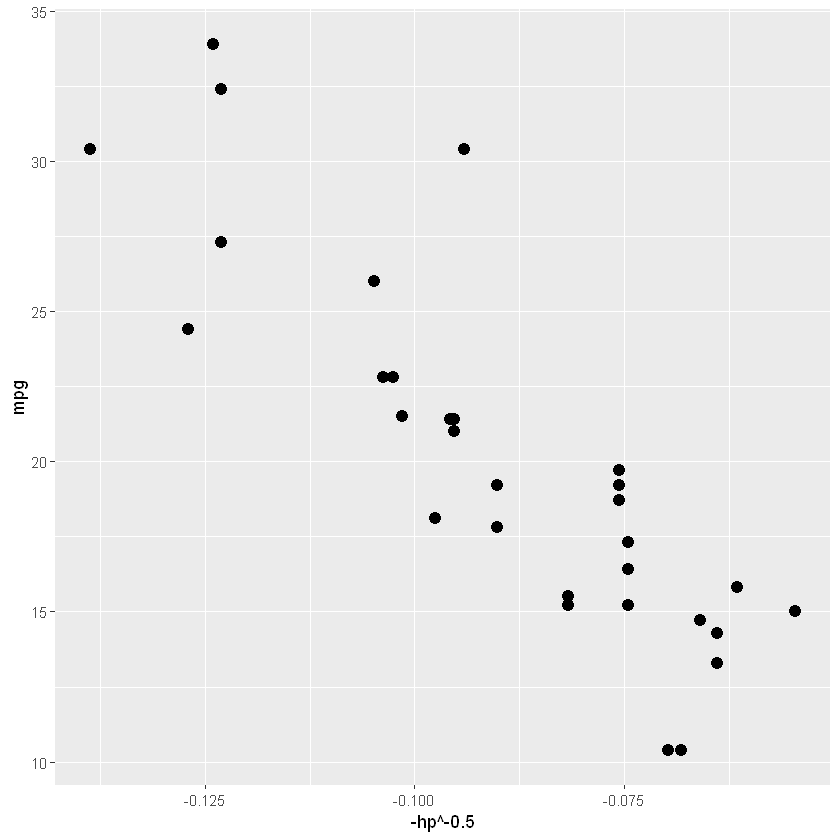

In [5]:
# -x - направление взаимосвязи восстанавливается
ggplot(mtcars, aes(x = -hp^-0.5, y = mpg)) + geom_point(size = 3)

[1] -0.7

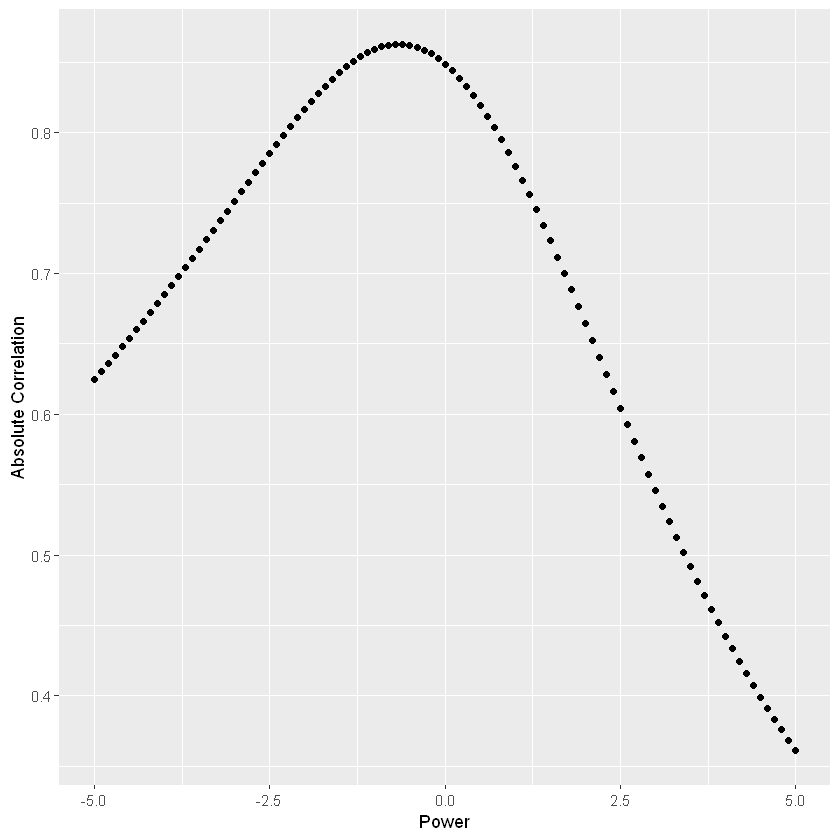

In [10]:
# Взаимосвязь между абсолютным значением корреляции и степенью в которую был возведен x
r <- c()
p <- seq(-5, 5, by = 0.1)

for (i in p){
    if (i != 0) {
        r <- append(r, abs(cor.test(x = mtcars$hp^i, y = mtcars$mpg)$es))
    } else {
        r <- append(r, abs(cor.test(x = log(mtcars$hp), y = mtcars$mpg)$es))  
    }
}

ggplot(data = data.frame(p = p, r = r), aes(x = p, y = r)) +
  geom_point() +
  xlab("Power") +
  ylab("Absolute Correlation")

p[which.max(r)] # максимальное значение корреляции = -0.7

Трансформация переменных - хорошее решение, если мы хотим добиться линейной взаимосвязи между переменными. Индикатором нелинейной взаимосвязи между переменными может служить **ненормальное** распределение остатков регрессии. При помощи трансформации Тьюки мы подбираем такой показатель степени, при котором **абсолютное значение корреляции** между переменными X и Y будет **максимальным**.


## 1.4 Логарифмическая трансформация переменных<a id='1.4'></a>

### Основные понятия и тезисы:   
Трансфомация Тьюки хорошо подходит для решения задач предсказания.  
Для решения задачи проверки гипотез взаимосвязи и выявления природы взаимосвязи подходит плохо, т.к. сложно интерпертировать результаты после преобразования данных.  

Проблему интерпретации помогает решить **логарифмическая трансформация**.  
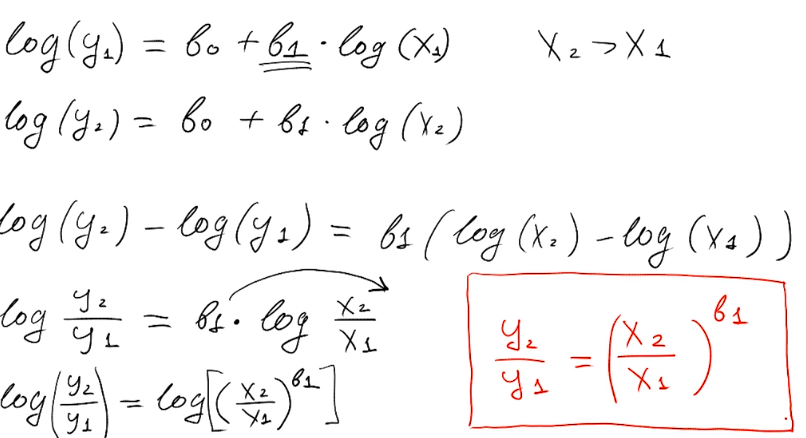  
Коэффициент B1 показывает, насколько % увеличится значение ЗП(y) при условии, что НП(x) увеличится на 1%.  

В модели **log(Y)=b1∗X+b0** - коэффициент наклона b1 означает:  
при единичном изменении переменной X, переменная Y в среднем изменяется на **100∗b1** процентов.  

В модели **Y=b1∗log(X)+b0** коэффициент наклона b1 означает:  
изменение на 1% по X в среднем приводит к **0.01∗b1** изменению по переменной Y.

*Примечание: справедливо в случае малого приращения переменной:*  
* *при увеличении X на единицу переменная Y в среднем изменится на 100 * (e^(b1) − 1) процентов. Выражение 100 ∗ b1 можно рассматривать лишь как линейное приближение точного выражения при значениях b1, близких к нулю.*  
* *Точно так же в модели log(Y) = b1 ∗ log(X) + b0 при увеличении X на 1% переменная Y в действительности изменится на 100 * ((101 / 100)^(b1) - 1) процентов, что мало отличается от b1 только при b1, близких к нулю. Например, уже при b1 = 100 приращение Y составит не 100%, а около 170%. С увеличением b1 по модулю расхождение между указанными выражениями будет возрастать неограниченно.*  
  
**Если несколько предикторов** - то для каждого предиктора подбираются свои степени трансформации с наиболее большим значением корреляции(для задач предсказания). Либо производится логарифмическая трансформация(для интерпретации).  

**Трансформация Бокса — Кокса (Box-Cox transformation)** — широко используемый метод трансформации данных. В контексте регрессии он обычно используется для трансформации зависимой переменной в случае, если у нас есть ненормальное распределение ошибок и/или нелинейность взаимосвязи, а также в случае гетероскедастичности.  
**Идея трансформации**:  
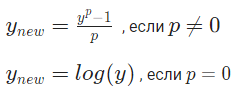  
Параметр p подбирается по схожей идее: используется то p, при котором качество модели максимально (обычно используется [метод максимального правдоподобия](https://ru.wikipedia.org/wiki/Метод_максимального_правдоподобия)). Например, в случае множественной регрессии можно трансформировать зависимую переменную, чтобы добиться более высокого качества модели и выполнения требования к данным.

### Примеры:

In [ ]:
library(ggplot2)

data(mtcars)

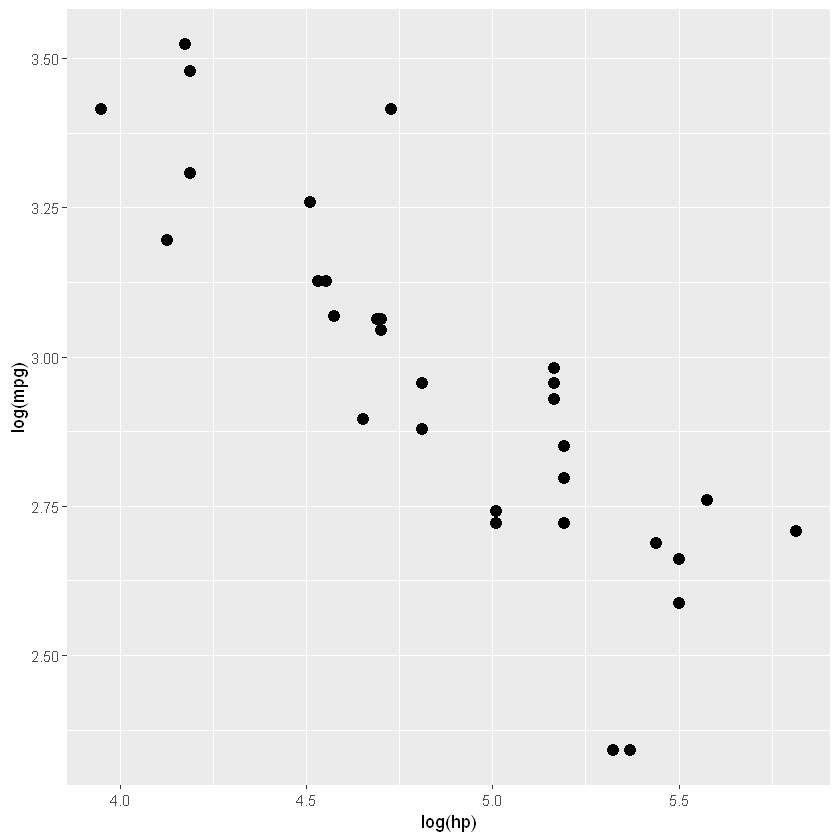

In [11]:
# Применение натурального логарифма к ЗП и НП - взаимосвязь стала более линейной
ggplot(mtcars, aes(x = log(hp), y = log(mpg))) + geom_point(size = 3)

In [14]:
# Интерпертация логарифмической трансформации
fit <- lm(log(mpg) ~ log(hp), mtcars)
summary(fit)

# log(hp)/Estimate = -0.53009 - в среднем, при единичном изменении показателя log(hp), 
# значение log(mpg) будет изменяться на -0.53009
# или
# в среднем, при изменении показателя hp на 1%, значение mpg будет изменяться на -0.53%


Call:
lm(formula = log(mpg) ~ log(hp), data = mtcars)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.38189 -0.05707 -0.00691  0.10815  0.37501 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  5.54538    0.29913  18.538  < 2e-16 ***
log(hp)     -0.53009    0.06099  -8.691 1.08e-09 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.1614 on 30 degrees of freedom
Multiple R-squared:  0.7157,	Adjusted R-squared:  0.7062 
F-statistic: 75.53 on 1 and 30 DF,  p-value: 1.08e-09


In [16]:
# В исследовании проверялась гипотеза о взаимосвязи мотивации студентов 
# и денежного вознаграждения за проделанную работу. 
# Исходные переменные оказались взаимосвязанными нелинейно, 
# поэтому независимая переменная — денежное вознаграждение — была прологарифмирована 
# (использовался натуральный логарифм).  
# В результате была получена следующая модель: мотивация = 120 ∗ log(вознаграждение) + 3

# Укажите, на сколько единиц в среднем увеличивается мотивация при увеличении вознаграждения на 10 процентов.  
# В ответе укажите целое число и не забывайте о правилах округления.

motivation1 = 120 * log(1) + 3
motivation2 = 120 * log(1.1) + 3 # x2/x1 = 1.1

round(motivation2 - motivation1)

[1] 11


	Shapiro-Wilk normality test

data:  fit$residuals
W = 0.92337, p-value = 0.02568


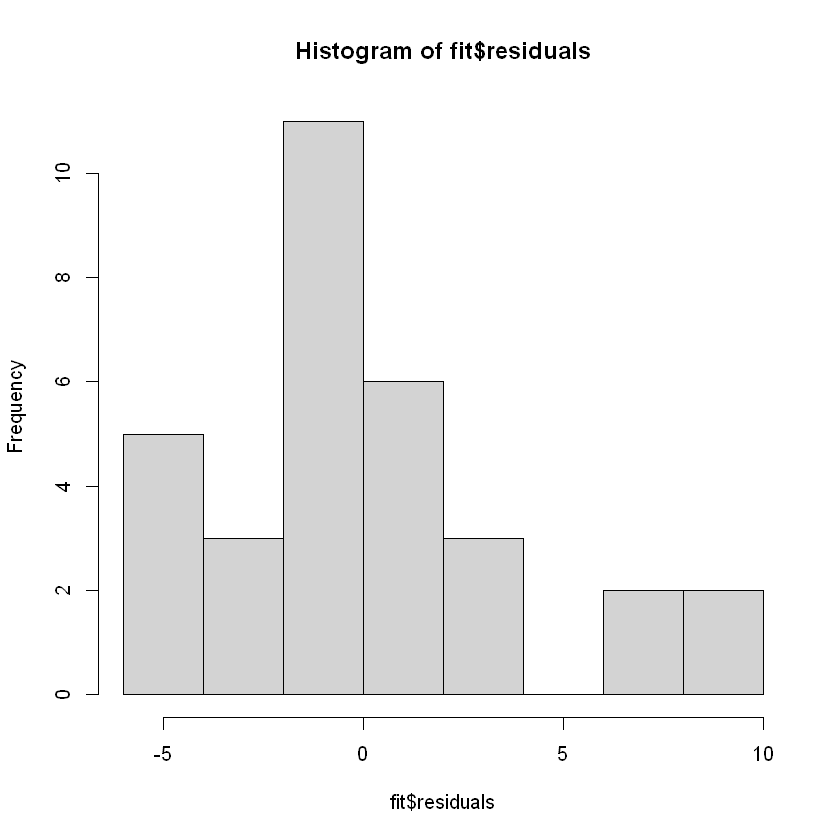

In [20]:
# Распределение остатков у модели без трансформации
fit <- lm(mpg ~ hp, mtcars) 
hist(fit$residuals)
shapiro.test(fit$residuals)
# p < 0.05 - остатки распределены не нормально


	Shapiro-Wilk normality test

data:  fit2$residuals
W = 0.94555, p-value = 0.1077


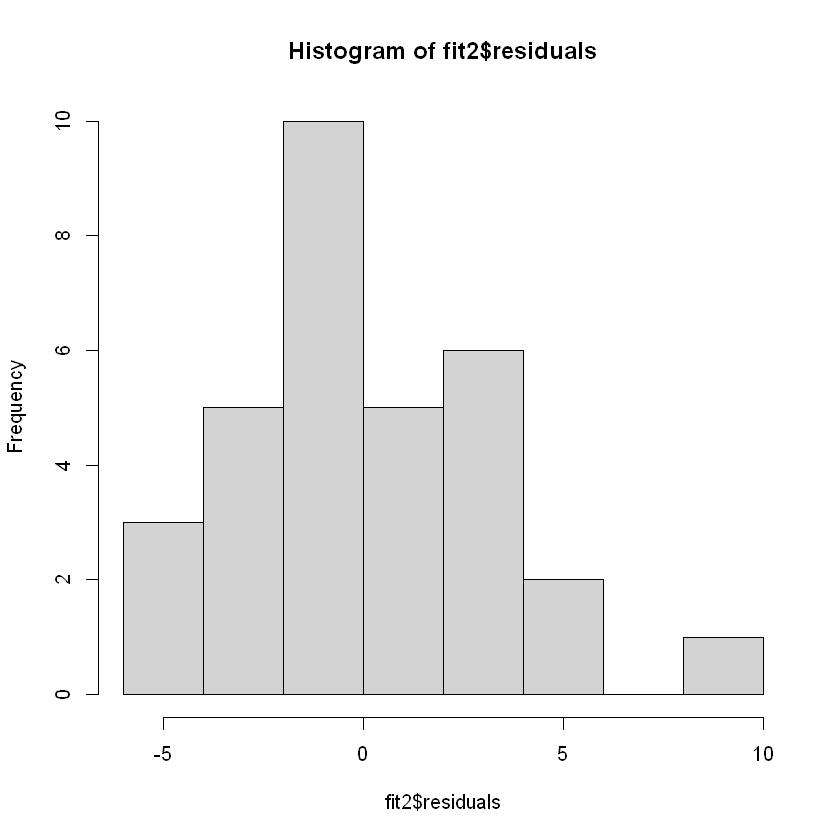

In [21]:
# Распределение остатков у модели с трансформацией
fit2 <- lm(mpg ~ I(-hp^-0.7), mtcars) 
hist(fit2$residuals)
shapiro.test(fit2$residuals)
# p > 0.05 - остатки распределены нормально


	Shapiro-Wilk normality test

data:  fit3$residuals
W = 0.96606, p-value = 0.3982


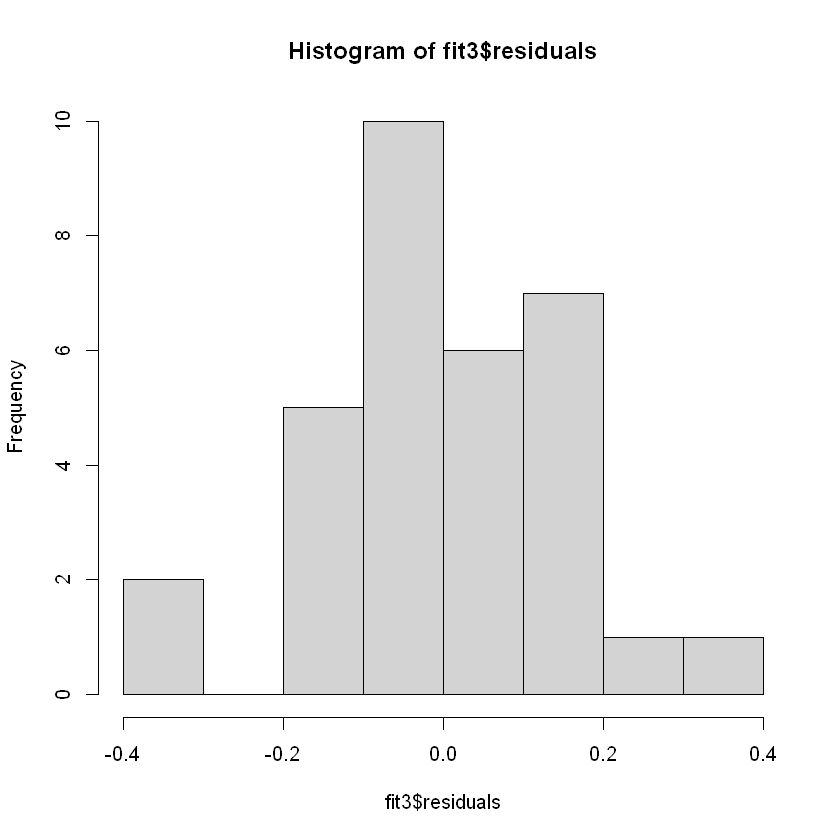

In [22]:
# Распределение остатков у модели с логарифмической трансформацией
fit3 <- lm(log(mpg) ~ log(hp), mtcars) 
hist(fit3$residuals)
shapiro.test(fit3$residuals)
# p > 0.05 - остатки распределены нормально

## 1.5 Проблема гетероскедастичности<a id='1.5'></a>